In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np



In [ ]:
data=pd.read_csv('/content/drive/MyDrive/slimlogix_task_data/stock/180min-patterns.csv')

In [ ]:
data.head()

cp         kvFst     kvTrgger  ... wave_angle   kvFst_r  kvTrgger_r
0  1068.00      0.000000     0.000000  ...   0.000000  0.000000    0.000000
1  1084.25      0.000000     0.000000  ...  82.763078  0.000000    0.000000
2  1083.25  -1785.000000  -255.000000  ...  78.503437 -0.017850   -0.002550
3  1058.50  -6961.782468 -1213.111781  ... -68.198591 -0.069618   -0.012131
4  1052.75 -11322.066533 -2657.248174  ... -72.387422 -0.113221   -0.026572

[5 rows x 12 columns]

In [ ]:
data.columns

Index(['cp', 'kvFst', 'kvTrgger', 'date_and_time', 'ripple_type', 'ripple_id',
       'wave_type', 'wave_grp_id', ' ripple_angle', 'wave_angle', 'kvFst_r',
       'kvTrgger_r'],
      dtype='object')

In [ ]:
w_data=data[['kvFst', 'kvTrgger', 'ripple_type',' ripple_angle', 'wave_type','wave_grp_id','wave_angle']]
w_binary_data=pd.get_dummies(w_data['wave_type'],drop_first=True,prefix='wave')
w_full_data=pd.concat([w_data, w_binary_data], axis=1)
w_full_data.drop(labels='wave_type',axis=1,inplace=True)
binary_data=pd.get_dummies(w_full_data['ripple_type'],drop_first=True)
w_full_data=pd.concat([w_full_data, binary_data], axis=1)
w_full_data.drop(labels='ripple_type',axis=1,inplace=True)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
# w_full_data[['s_kvFst', 's_kvTrgger','s_ripple_angle','s_wave_angle']]= scaler.fit_transform(w_full_data[['kvFst', 'kvTrgger',' ripple_angle','wave_angle']])
# w_full_data.drop(labels=['kvFst', 'kvTrgger',' ripple_angle','wave_angle'],axis=1,inplace=True)

In [ ]:
w_full_data.head()

kvFst     kvTrgger   ripple_angle  ...  wave_angle  wave_up  up
0      0.000000     0.000000       0.000000  ...    0.000000        0   1
1      0.000000     0.000000      82.763078  ...   82.763078        0   1
2  -1785.000000  -255.000000       0.000000  ...   78.503437        0   0
3  -6961.782468 -1213.111781     -85.333142  ...  -68.198591        0   0
4 -11322.066533 -2657.248174     -84.336294  ...  -72.387422        0   0

[5 rows x 7 columns]

In [ ]:
w_data_sequences=[]
w_label_list=[]
w_sequence_length=50
for i in range(0,w_full_data.wave_grp_id.max()):
  tem_data=w_full_data[w_full_data['wave_grp_id']==i]
  enteries=tem_data.shape[0]
  remaining_enteries=w_sequence_length-enteries
  w_label=tem_data.iloc[-1].wave_up.astype(int)
  tem_data.drop(labels='wave_up',axis=1,inplace=True)
  if(remaining_enteries>0 and enteries>1):
    ripple=tem_data.to_numpy()
    w_label_list.append(w_label)
    zeros = np.zeros((remaining_enteries, 6))
    sequence= np.vstack([zeros, ripple])
    print(ripple.shape,"after appending : ",sequence.shape)
    w_data_sequences.append(sequence)
  elif(False):
      w_label_list.append(label) #remaining_enteries<=0
      tem_data_=tem_data.iloc[(tem_data.shape[0]-w_sequence_length):]
      ripple=tem_data_.to_numpy()
      print(tem_data.shape ," after retain or deducting : ",sequence.shape)
      w_data_sequences.append(sequence)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(9, 6) after appending :  (50, 6)
(16, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(8, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(8, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(42, 6) after appending : 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(17, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(8, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(39, 6) after appending 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(13, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(48, 6) after appending :  (50, 6)
(45, 6) after appending 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(17, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(39, 6) after appending :  (50, 6)
(48, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(14, 6) after appending :

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(20, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(44, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(44, 6) after appending :  (50, 6)
(19, 6) after appending :  

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(36, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(47, 6) after appending :  (50, 6)
(42, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(43, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(41, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(37, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(17, 6) after appendi

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(30, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(49, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(39, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(45, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(20, 6) after appendin

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(22, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(49, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(40, 6) after appending :  (50, 6)
(40, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(48, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(43, 6) after appending :  (50, 6)
(44, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(17, 6) after appending 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(27, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(25, 6) after appending :  (50, 6)
(49, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(42, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(48, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(47, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(44, 6) after appendi

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(15, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(25, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(39, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(44, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(14, 6) after appendin

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(49, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(45, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(39, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(25, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(43, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(47, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(29, 6) after appending : 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(41, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(8, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(38, 6) after appending :

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(7, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(42, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(39, 6) after appending :  (50, 6)
(49, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(45, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(37, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(45, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(28, 6) after appendin

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(50, 6)
(11, 6) after appending :  (50, 6)
(44, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(8, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(49, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(44, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(46, 6) after ap

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(30, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(40, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(39, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(48, 6) after appending :  (50, 6)
(44, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(45, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(25, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(44, 6) after appending :  (50, 6)
(41, 6) after append

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(19, 6) after appending :  (50, 6)
(43, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(48, 6) after appending :  (50, 6)
(15, 6) after appending 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(24, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(43, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(40, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(25, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(49, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(25, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(32, 6) after appending :

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(15, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(41, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(48, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(40, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(42, 6) after appending :  (50, 6)
(37, 6) after appending :  (50, 6)
(17, 6) after appendi

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(10, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(47, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(41, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(25, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(45, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(17, 6) after appending

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(15, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(8, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(41, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(40, 6) after appending :  (50, 6)
(40, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(47, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(25, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(5, 6) after appending :

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(22, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(42, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(47, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(42, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(36, 6) after appendin

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(34, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(37, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(48, 6) after appending :  (50, 6)
(45, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(42, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(39, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(49, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(39, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(43, 6) after appending 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(38, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(43, 6) after appending :  (50, 6)
(48, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(47, 6) after appending :  (50, 6)
(42, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(15, 6) after appendin

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(20, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(40, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(47, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(34, 6) after appending

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(43, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(42, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(25, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(34, 6) after appending 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(19, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(44, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(25, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(24, 6) after appending :  

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(12, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(25, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(42, 6) after appending :  (50, 6)
(43, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(49, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(48, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(11, 6) after appending

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(38, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(44, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(48, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(47, 6) after appending :  (50, 6)
(14, 6) after appending :

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(27, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(41, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(41, 6) after appending :  (50, 6)
(44, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(15, 6) after appendi

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(34, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(37, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(40, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(47, 6) after appending :  (50, 6)
(45, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(39, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(36, 6) after appendin

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(32, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(44, 6) after appending :  (50, 6)
(40, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(40, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(32, 6) after appendi

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(21, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(45, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(44, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(27, 6) after appending

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(49, 6) after appending :  (50, 6)
(44, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(44, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(8, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(48, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(40, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(43, 6) after appending :  (50, 6)
(8, 6) after appending :  (50, 6)
(40, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(26, 6) after appending : 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(13, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(42, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(37, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(40, 6) after appending :  (50, 6)
(43, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(39, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(21, 6) after appendi

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(26, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(49, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(47, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(39, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(49, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(36, 6) after appending

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(11, 6) after appending :  (50, 6)
(40, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(45, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(42, 6) after appending :  (50, 6)
(45, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(37, 6) after appending :  (50, 6)
(44, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(37, 6) after appending :  (50, 6)
(40, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(49, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(23, 6) after appendin

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(13, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(39, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(41, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(48, 6) after appending :  (50, 6)
(47, 6) after appending :  (50, 6)
(41, 6) after appending :  (50, 6)
(25, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(45, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(39, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(19, 6) after appendi

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(11, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(39, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(49, 6) after appending :  (50, 6)
(25, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(49, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(43, 6) after appending :  (50, 6)
(47, 6) after appending 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(28, 6) after appending :  (50, 6)
(46, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(25, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(25, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(8, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(39, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(36, 6) after appending :

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(5, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(45, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(39, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(45, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(47, 6) after appending :  (50, 6)
(8, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(42, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(26, 6) after appending

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(25, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(41, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(42, 6) after appending :  (50, 6)
(11, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(44, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(41, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(49, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(17, 6) after appending

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(36, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(36, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(49, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(29, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(39, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(43, 6) after appending :  (50, 6)
(38, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(32, 6) after appending :  (50, 6)
(26, 6) after appending 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(15, 6) after appending :  (50, 6)
(49, 6) after appending :  (50, 6)
(49, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(41, 6) after appending :  (50, 6)
(40, 6) after appending :  (50, 6)
(45, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(34, 6) after appending :  (50, 6)
(26, 6) after appending :  (50, 6)
(43, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(43, 6) after appending :  (50, 6)
(24, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(16, 6) after appending :  (50, 6)
(31, 6) after appending :  (50, 6)
(35, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(27, 6) after appending :  (50, 6)
(16, 6) after appending :  (50, 6)
(25, 6) after appending :  (50, 6)
(13, 6) after append

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(15, 6) after appending :  (50, 6)
(15, 6) after appending :  (50, 6)
(42, 6) after appending :  (50, 6)
(20, 6) after appending :  (50, 6)
(23, 6) after appending :  (50, 6)
(7, 6) after appending :  (50, 6)
(5, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(10, 6) after appending :  (50, 6)
(13, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(18, 6) after appending :  (50, 6)
(22, 6) after appending :  (50, 6)
(30, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(6, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(18, 6) after appending :  (50, 6)
(19, 6) after appending :  (50, 6)
(9, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(28, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(12, 6) after appending :  (50, 6)
(17, 6) after appending :  (50, 6)
(14, 6) after appending :  (50, 6)
(21, 6) after appending :  (50, 6)
(33, 6) after appending :  (50, 6)
(4, 6) after appending :

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

In [ ]:
split=int(len(w_data_sequences)/10)*8
w_x_train =w_data_sequences[0:split]
w_x_test=w_data_sequences[split:]
w_y_train=w_label_list[0:split]
w_y_test=w_label_list[split:]


In [ ]:
w_x_train = np.array(w_x_train)
w_x_train = w_x_train.astype('float32')
w_x_test = np.array(w_x_test)
w_x_test = w_x_test.astype('float32')
w_y_train = np.array(w_y_train)
w_y_test = np.array(w_y_test)

In [ ]:
w_x_train.shape

(1336, 50, 6)

In [ ]:
w_y_train.shape

(1336,)

In [ ]:
,,,

In [ ]:
import keras 
import tensorflow as tf
import io
import zipfile
import os
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import graphviz 
from keras.layers import TimeDistributed, Conv3D, Input, Flatten, Dense,Activation,Conv2D, MaxPooling3D,Dropout,GlobalMaxPool3D,GRU,LSTM
from keras.losses import categorical_crossentropy,BinaryCrossentropy
from keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint_filepath='/content/drive/MyDrive/slimlogix_task_data/stock/wave_best_model.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
earlys_topping = EarlyStopping(monitor='val_accuracy', patience=15)
call_backs = [earlys_topping,model_checkpoint_callback]
regressor = Sequential()

regressor.add(LSTM(units = w_sequence_length, return_sequences = True, input_shape = (w_sequence_length,6)))
regressor.add(Dropout(0.2))

# regressor.add(LSTM(units = 50,activation='relu', return_sequences = True))
# regressor.add(Dropout(0.2))

regressor.add(LSTM(units = w_sequence_length,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = w_sequence_length,activation='relu'))
# regressor.add(Dense(units = 50,activation='relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1,activation='sigmoid'))

regressor.compile(optimizer = 'adam',metrics=['accuracy'], loss = BinaryCrossentropy())

regressor.fit(w_x_train, w_y_train,validation_data=(w_x_test, w_y_test) ,epochs = 100, batch_size = 12,callbacks=call_backs)

Epoch 1/100
112/112 [==============================] - 41s 325ms/step - loss: 0.6526 - accuracy: 0.6153 - val_loss: 0.6922 - val_accuracy: 0.5452
Epoch 2/100
112/112 [==============================] - 35s 313ms/step - loss: 0.6378 - accuracy: 0.6287 - val_loss: 0.6759 - val_accuracy: 0.5539
Epoch 3/100
112/112 [==============================] - 35s 311ms/step - loss: 0.6243 - accuracy: 0.6407 - val_loss: 0.6597 - val_accuracy: 0.5714
Epoch 4/100
112/112 [==============================] - 35s 311ms/step - loss: 0.6270 - accuracy: 0.6355 - val_loss: 0.6561 - val_accuracy: 0.6093
Epoch 5/100
112/112 [==============================] - 34s 307ms/step - loss: 0.6184 - accuracy: 0.6370 - val_loss: 0.7220 - val_accuracy: 0.5452
Epoch 6/100
112/112 [==============================] - 34s 308ms/step - loss: 0.6164 - accuracy: 0.6504 - val_loss: 0.6668 - val_accuracy: 0.5743
Epoch 7/100
112/112 [==============================] - 35s 309ms/step - loss: 0.6132 - accuracy: 0.6422 - val_loss: 0.6631 -

### **start code for wave ripple group prediction**


In [ ]:
data.columns

Index(['cp', 'kvFst', 'kvTrgger', 'date_and_time', 'ripple_type', 'ripple_id',
       'wave_type', 'wave_grp_id', ' ripple_angle', 'wave_angle', 'kvFst_r',
       'kvTrgger_r'],
      dtype='object')

In [ ]:
r_data=data[['kvFst', 'kvTrgger',  'ripple_type', 'ripple_id',' ripple_angle']]
binary_data=pd.get_dummies(r_data['ripple_type'],drop_first=True)
full_data=pd.concat([r_data, binary_data], axis=1)
full_data.drop(labels='ripple_type',axis=1,inplace=True)

In [ ]:
full_data.head()

kvFst     kvTrgger  ripple_id   ripple_angle  up
0      0.000000     0.000000          0       0.000000   1
1      0.000000     0.000000          0      82.763078   1
2  -1785.000000  -255.000000          1       0.000000   0
3  -6961.782468 -1213.111781          1     -85.333142   0
4 -11322.066533 -2657.248174          1     -84.336294   0

In [ ]:
data_sequences=[]
label_list=[]
sequence_length=16
for i in range(0,full_data.ripple_id.max()):
  tem_data=full_data[full_data['ripple_id']==i]
  enteries=tem_data.shape[0]
  remaining_enteries=sequence_length-enteries
  label=tem_data.iloc[-1].up.astype(int)
  tem_data.drop(labels='up',axis=1,inplace=True)
  ripple=tem_data.to_numpy()
  if(remaining_enteries>0):
    label_list.append(label)
    zeros =np.zeros((remaining_enteries, 4))
    sequence= np.vstack([zeros, ripple])
    print(sequence.shape)
    data_sequences.append(sequence)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p


(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p


(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p


(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p


(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p


(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p


(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p


(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

In [ ]:
split=int(len(data_sequences)/10)*8
x_train =data_sequences[0:split]
x_test=data_sequences[split:]
y_train=label_list[0:split]
y_test=label_list[split:]


In [ ]:
x_train = np.array(x_train)
x_train = x_train.astype('float32')
x_test = np.array(x_test)
x_test = x_test.astype('float32')
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
x_train.shape

(7832, 16, 4)

In [ ]:
y_train.shape

(7832,)

In [ ]:
import keras 
import tensorflow as tf
import io
import zipfile
import os
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import graphviz 
from keras.layers import TimeDistributed, Conv3D, Input, Flatten, Dense,Activation,Conv2D, MaxPooling3D,Dropout,GlobalMaxPool3D,GRU,LSTM
from keras.losses import categorical_crossentropy,BinaryCrossentropy

In [ ]:
checkpoint_filepath='/content/drive/MyDrive/slimlogix_task_data/stock/ripple_best_model.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
earlys_topping = EarlyStopping(monitor='val_accuracy', patience=8)
call_backs = [earlys_topping,model_checkpoint_callback]
regressor = Sequential()

regressor.add(LSTM(units = 16, return_sequences = True, input_shape = (sequence_length,4)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 500,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1,activation='sigmoid'))

regressor.compile(optimizer = 'adam',metrics=['accuracy'], loss = BinaryCrossentropy())

regressor.fit(x_train, y_train,validation_data=(x_test, y_test) ,epochs = 130, batch_size = 32,callbacks=call_backs)

Epoch 1/130
245/245 [==============================] - 44s 153ms/step - loss: 0.5719 - accuracy: 0.7311 - val_loss: 0.6196 - val_accuracy: 0.6662
Epoch 2/130
245/245 [==============================] - 36s 148ms/step - loss: 0.5535 - accuracy: 0.7324 - val_loss: 0.6457 - val_accuracy: 0.6662
Epoch 3/130
245/245 [==============================] - 36s 147ms/step - loss: 0.5399 - accuracy: 0.7315 - val_loss: 0.6016 - val_accuracy: 0.6585
Epoch 4/130
245/245 [==============================] - 36s 147ms/step - loss: 0.5308 - accuracy: 0.7324 - val_loss: 0.6151 - val_accuracy: 0.6662
Epoch 5/130
245/245 [==============================] - 37s 149ms/step - loss: 0.5180 - accuracy: 0.7460 - val_loss: 0.6107 - val_accuracy: 0.6768
Epoch 6/130
245/245 [==============================] - 37s 149ms/step - loss: 0.5058 - accuracy: 0.7568 - val_loss: 0.5875 - val_accuracy: 0.7033
Epoch 7/130
245/245 [==============================] - 36s 148ms/step - loss: 0.4931 - accuracy: 0.7639 - val_loss: 0.6028 -

# **work completed**

In [ ]:
# enteries=tem_data.shape[0]
# remaining_enteries=16-enteries
# if(remaining_enteries>0):
#   ripple=tem_data.to_numpy()
#   zeros = data=np.zeros((remaining_enteries, 5))

In [ ]:

# ripple_id=r_data.ripple_id
# r_data.drop(labels='ripple_id', axis=1,inplace=True)
# r_data.head()

kvFst     kvTrgger ripple_type   ripple_angle
0      0.000000     0.000000          up       0.000000
1      0.000000     0.000000          up      82.763078
2  -1785.000000  -255.000000        down       0.000000
3  -6961.782468 -1213.111781        down     -85.333142
4 -11322.066533 -2657.248174        down     -84.336294

In [ ]:
max=-10

In [ ]:
list_len=[]

In [ ]:
# for i in range(0,r_data.ripple_id.max()):
#   t=r_data[r_data['ripple_id']==i]
#   list_len.append(t.shape[0])
#   if(t.shape[0]>max):
#     max=t.shape[0]

In [ ]:
# for i in range(0,w_data.wave_grp_id.max()):
#   t=w_data[w_data['wave_grp_id']==i]
#   list_len.append(t.shape[0])
#   if(t.shape[0]>max):
#     max=t.shape[0]

In [ ]:
# t=r_data[r_data['ripple_id']==0]

In [ ]:
# enteries=t.shape[0]
# remaining_enteries=16-enteries
# if(remaining_enteries>0):
#   zeros=t.to_numpy()
#   ripple = data=np.zeros((remaining_enteries, 5))

In [ ]:
# ripple.shape

(14, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


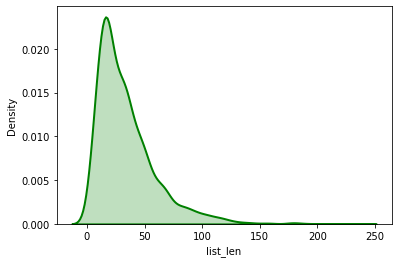

In [ ]:
# df = pd.DataFrame({"list_len": list_len})
# sns.distplot(df["list_len"], hist = False, kde = True,
#             kde_kws = {'shade': True, 'linewidth': 2}, 
#             label = "Normal", color ="green")

list_len
0         2
1         5
2         2
3         2
4         2

In [ ]:
max

34

In [ ]:
t=r_data[r_data['ripple_id']==1]

In [ ]:
t

kvFst     kvTrgger  ... ripple_id  ripple_angle
2  -1785.000000  -255.000000  ...         1      0.000000
3  -6961.782468 -1213.111781  ...         1    -85.333142
4 -11322.066533 -2657.248174  ...         1    -84.336294
5  -9247.881207 -3598.767179  ...         1    -80.134193
6 -16571.192546 -5451.970803  ...         1    -83.443054

[5 rows x 6 columns]

In [ ]:
t.shape[0]

5